In [1]:
#Import Libraries
import os,json
import pandas as pd
import yaml
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
from sklearn.decomposition import PCA
import numpy as np

In [2]:
path_to_json = 'PD/'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]

pd_list= []
for index, js in enumerate(json_files):
    with open(os.path.join(path_to_json, js)) as json_file:
        json_dict = json.load(json_file)
        pd_str = json.dumps(json_dict)
        pd_data = yaml.load(pd_str)
        pd_list.append(pd_data)
pd_nor = json_normalize(pd_list)

In [3]:
len(pd_list)

100

In [4]:
#Create multiple columns for MFCC and chroma_vector
MFCC = pd_nor['features.audio.MFCC'].apply(pd.Series)
MFCC = MFCC.rename(columns = lambda x : 'MFCC-' + str(x))

chroma_vector = pd_nor['features.audio.chroma_vector'].apply(pd.Series)
chroma_vector = chroma_vector.rename(columns = lambda x : 'chroma-vector-' + str(x))

#Concatenate the new columns to the main dataframe
pd_nor = pd.concat([pd_nor[:], MFCC[:], chroma_vector[:]], axis=1)

#Drop MFCC & chroma vector columns
pd_nor.drop(['features.audio.MFCC'], axis=1, inplace=True)
pd_nor.drop(['features.audio.chroma_vector'], axis=1, inplace=True)

In [5]:
#Create a csv file - to avoid reprocessing of all json files
df = pd.DataFrame(pd_nor)
df.to_csv('pd.csv', encoding='utf-8')

In [6]:
#Retain columns required
df = df.drop(['appversion','audiocountdown','createdon','healthcode','medtimepoint','phoneinfo','recordID2','recordingID','unnamed'], axis = 1)

In [7]:
#Extract column names
column_names = list(df.columns.values)

#Empty dataframe
new_df = pd.DataFrame()

#Calulate mean for each feature
for i in range(len(df.columns)):
    temp = ''.join(column_names[i].split('.',2)[-1])
    new_col_name = temp + '_' + 'mean'
    temp = df.iloc[:,i].apply(pd.Series)
    new_df[new_col_name] = temp.mean(axis=1)
    
new_df

ZCR_mean  chroma_deviation_mean  energy_mean  entropy_mean  \
0   0.028154               0.023309     0.015015      3.255056   
1   0.033820               0.022154     0.009652      3.124586   
2   0.032737               0.021416     0.019939      3.113010   
3   0.026245               0.027546     0.012426      3.096117   
4   0.032421               0.025028     0.006187      3.066077   
5   0.036277               0.021986     0.010189      3.191753   
6   0.024331               0.027276     0.004224      3.003190   
7   0.036705               0.022258     0.011481      3.063914   
8   0.017372               0.042926     0.056925      3.193723   
9   0.053735               0.018762     0.021433      3.065254   
10  0.035482               0.022643     0.017953      3.099275   
11  0.034763               0.032016     0.012322      3.150929   
12  0.075776               0.014660     0.002943      3.189215   
13  0.045293               0.026173     0.009411      3.096217   
14  0.052895               0.033569     0.010089      3.249572   
15  0.044923               0.014504     0.061726      3.210698   
16  0.066018               0.023409     0.015331      3.192940   
17  0.034109               0.033493     0.013608      3.286199   
18  0.073021               0.018021     0.009087      3.156459   
19  0.045917               0.030347     0.011301      3.262660   
20  0.035180               0.026930     0.014655      3.125953   
21  0.027602               0.039739     0.011044      3.232934   
22  0.030759               0.019454     0.005436      2.901848   
23  0.057315               0.013201     0.012922      3.009179   
24  0.027598               0.023620     0.026780      3.284373   
25  0.050103               0.017726     0.020536      3.091194   
26  0.040138               0.049156     0.011256      3.184393   
27  0.046061               0.026468     0.008969      3.122107   
28  0.037980               0.024173     0.013654      3.015148   
29  0.028278               0.041829     0.072059      3.224419   
..       ...                    ...          ...           ...   
70  0.036511               0.033519     0.017078      3.257776   
71  0.053912               0.010405     0.105424      3.233308   
72  0.022654               0.038379     0.005311      3.262006   
73  0.031696               0.027993     0.021007      3.042226   
74  0.033064               0.024340     0.048652      3.175330   
75  0.034403               0.018040     0.007877      3.058186   
76  0.047089               0.023391     0.027375      3.191236   
77  0.027275               0.027043     0.023038      3.282377   
78  0.044166               0.018384     0.008717      3.187193   
79  0.027091               0.030824     0.011331      3.060052   
80  0.033451               0.032526     0.058140      3.276653   
81  0.049615               0.017503     0.018979      2.964573   
82  0.028702               0.021180     0.021298      2.927551   
83  0.037284               0.014563     0.032320      3.225020   
84  0.048361               0.025904     0.014023      3.189169   
85  0.030732               0.027242     0.031956      3.091020   
86  0.012399               0.036003     0.008409      3.185217   
87  0.044225               0.028933     0.027845      3.062265   
88  0.029836               0.028089     0.009586      3.220128   
89  0.049790               0.013774     0.010954      3.064190   
90  0.052506               0.029087     0.015797      3.194845   
91  0.031946               0.023930     0.007332      3.196179   
92  0.033867               0.044000     0.026784      3.275319   
93  0.112011               0.030192     0.014790      3.101463   
94  0.079085               0.006339     0.019850      3.197603   
95  0.046084               0.009174     0.004117      3.192943   
96  0.031184               0.022408     0.016356      2.942878   
97  0.016889               0.046182     0.035380      3.298709   
98  0.019801               0.057857     0.06

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
[0.48753210359600535, 0.66714058471979776, 0.75555113971923382, 0.80090543218321941, 0.84494676297688054, 0.88176659916071931, 0.90807237690562215, 0.93291799748601412, 0.95148720492919969, 0.96796157326335741, 0.9791066141175867, 0.98794411147627403, 0.99309778867171494, 0.99651967303894518, 0.99841839673628296, 0.99875258889544982, 0.99901506856311695, 0.99923090638003964, 0.99940786826379391, 0.99956037755590998, 0.99969472371641455, 0.99976826782488704, 0.99982739446254942, 0.99987034428997101, 0.99990714960710314, 0.99993414599796682, 0.99995432421206421, 0.99997260900199203, 0.99998356328236016, 0.99999281540856055, 0.99999607998690809, 0.99999822102141445]


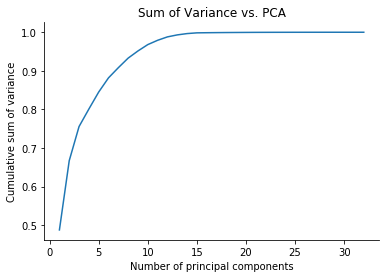

In [8]:
#Applying PCA
components = range(1,33)
temp_i = []
temp_sum_variance = []
for i in components:
    pca = PCA(n_components=i)
    pca.fit(new_df)
    sum_variance = np.sum(pca.explained_variance_ratio_)
    temp_i.append(i)
    temp_sum_variance.append(sum_variance)
print(temp_i)
print(temp_sum_variance)

ax = plt.subplot(111)
ax.plot(temp_i,temp_sum_variance)
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative sum of variance')
plt.title('Sum of Variance vs. PCA')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()